In [1]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd 
import numpy as np

Mounted at /content/drive


## Input

### User

##### one hot encoding user features

In [ ]:
user_features = pd.read_csv("/content/drive/MyDrive/final/users/users_with_feature_vector.csv")
user_features.head(2)

,user_id,age_group,gender_switch,zip_zones,occupation_one_hot,feature_vector
0,u1,0,0,9,0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0,"[0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
1,u2,6,1,14,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0,"[6, 1, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# age group

age = LabelEncoder().fit_transform(user_features['age_group'])
age = OneHotEncoder().fit_transform(age.reshape(-1, 1)).toarray()
age_list = []
for i in range(len(age)):
  age_list.append(list(age[i].astype(int)))

user_features["age_group_one_hot"]= age_list

# gender

gen = LabelEncoder().fit_transform(user_features['gender_switch'])
gen = OneHotEncoder().fit_transform(gen.reshape(-1, 1)).toarray()
gen_list = []
for i in range(len(gen)):
  gen_list.append(list(gen[i].astype(int)))

user_features["gender_one_hot"]= gen_list

# zip zones

zip = LabelEncoder().fit_transform(user_features['zip_zones'])
zip = OneHotEncoder().fit_transform(zip.reshape(-1, 1)).toarray()
zip_list = []
for i in range(len(zip)):
  zip_list.append(list(zip[i].astype(int)))

user_features["zip_zones_one_hot"]= zip_list
user_features.head()

,user_id,age_group,gender_switch,zip_zones,occupation_one_hot,feature_vector,age_group_one_hot,gender_one_hot,zip_zones_one_hot
0,u1,0,0,9,0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0,"[0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[1, 0, 0, 0, 0, 0, 0]","[1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
1,u2,6,1,14,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0,"[6, 1, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 1]","[0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
2,u3,2,1,11,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0,"[2, 1, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 1, 0, 0, 0, 0]","[0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
3,u4,4,1,0,0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0,"[4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0]","[0, 1]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,u5,2,1,11,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1,"[2, 1, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 1, 0, 0, 0, 0]","[0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."


In [ ]:
user_features = user_features.drop(columns=["age_group","gender_switch","zip_zones","feature_vector"])
user_features.head(2)

,user_id,occupation_one_hot,age_group_one_hot,gender_one_hot,zip_zones_one_hot
0,u1,0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0,"[1, 0, 0, 0, 0, 0, 0]","[1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
1,u2,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0,"[0, 0, 0, 0, 0, 0, 1]","[0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."


In [ ]:
feature_vectors = []
for i in range(len(user_features)):
  occu = list(map(int, user_features["occupation_one_hot"][i].split(' ')))
  # print(len(occu))
  age = user_features["age_group_one_hot"][i]
  # print(len(age))
  gender = user_features["gender_one_hot"][i]
  # print(len(gender))
  zip = user_features["zip_zones_one_hot"][i]
  # print(len(zip))
  fv = occu + age + gender + zip
  feature_vectors.append(fv)

user_features["feature_vector"] = feature_vectors
user_features.head(2)

,user_id,occupation_one_hot,age_group_one_hot,gender_one_hot,zip_zones_one_hot,feature_vector
0,u1,0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0,"[1, 0, 0, 0, 0, 0, 0]","[1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
1,u2,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0,"[0, 0, 0, 0, 0, 0, 1]","[0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
user_features.to_csv("/content/drive/MyDrive/main/ml-1m/user_one_hot.csv", index=False)

##### clubbing similar user features

In [ ]:
user_features = pd.read_csv("/content/drive/MyDrive/final/users/user_one_hot.csv")
user_features.head()

,user_id,occupation_one_hot,age_group_one_hot,gender_one_hot,zip_zones_one_hot,feature_vector
0,u1,0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0,"[1, 0, 0, 0, 0, 0, 0]","[1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
1,u2,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0,"[0, 0, 0, 0, 0, 0, 1]","[0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,u3,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0,"[0, 0, 1, 0, 0, 0, 0]","[0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,u4,0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0,"[0, 0, 0, 0, 1, 0, 0]","[0, 1]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
4,u5,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1,"[0, 0, 1, 0, 0, 0, 0]","[0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
uul = pd.read_csv("/content/drive/MyDrive/final/users/training_set_top_10_similar_users.csv")
uul.head()

,user_id,top_10_similar_users
0,u3451,"['u3240', 'u3749', 'u3080', 'u4562', 'u4165', ..."
1,u2099,"['u1520', 'u1886', 'u2213', 'u3069', 'u4007', ..."
2,u371,"['u182', 'u302', 'u3733', 'u2828', 'u3192', 'u..."
3,u4037,"['u2231', 'u4169', 'u3292', 'u307', 'u59', 'u3..."
4,u2416,"['u2672', 'u4844', 'u2685', 'u3640', 'u2814', ..."


In [ ]:
import ast 
from operator import add

count = 0
clubbed_vec = []
for i in uul.index:
  u = uul["user_id"][i]
  sim_users = ast.literal_eval(uul["top_10_similar_users"][i])
  u_fv = [0 for _ in range(50)]
  for v in sim_users:
    # print(v)
    v_fv = np.array(user_features[user_features["user_id"]==v]["feature_vector"])
    v_fv = ast.literal_eval(v_fv[0])
    # print(v_fv)
    u_fv = list( map(add, u_fv, v_fv) )
    # print(u_fv)
    # break
  clubbed_vec.append(u_fv)
  # break
  count+=1
  if count%200==0:
    print("Done with", count, "users")
# print(clubbed_vec)
uul["clubbed_vector"] = clubbed_vec

Done with 200 users
Done with 400 users
Done with 600 users
Done with 800 users
Done with 1000 users
Done with 1200 users
Done with 1400 users
Done with 1600 users
Done with 1800 users
Done with 2000 users
Done with 2200 users
Done with 2400 users
Done with 2600 users
Done with 2800 users
Done with 3000 users
Done with 3200 users
Done with 3400 users
Done with 3600 users
Done with 3800 users
Done with 4000 users
Done with 4200 users
Done with 4400 users
Done with 4600 users
Done with 4800 users
Done with 5000 users
Done with 5200 users
Done with 5400 users
Done with 5600 users
Done with 5800 users
Done with 6000 users


In [ ]:
uul.head(2)

,user_id,top_10_similar_users,clubbed_vector
0,u3451,"['u3240', 'u3749', 'u3080', 'u4562', 'u4165', ...","[2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, ..."
1,u2099,"['u1520', 'u1886', 'u2213', 'u3069', 'u4007', ...","[1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, ..."


In [ ]:
uul.to_csv("/content/drive/MyDrive/final/users/training_set_top_10_similar_users_with_vector.csv", index=False)

##### genre overview

In [ ]:
user_genre = pd.read_csv("/content/drive/MyDrive/final/users/user_genre_overview.csv")
user_genre.head()

,user_id,genre_overview
0,u4165,"[0.03297, 0.0, 0.05495, 0.04396, 0.50549, 0.02..."
1,u4536,"[0.17857, 0.04762, 0.0119, 0.02381, 0.09524, 0..."
2,u3009,"[0.2381, 0.06349, 0.0, 0.0, 0.1746, 0.07937, 0..."
3,u166,"[0.09401, 0.07051, 0.01998, 0.047, 0.16099, 0...."
4,u3596,"[0.04082, 0.03265, 0.01633, 0.01224, 0.16735, ..."


##### user embedding dataframe

In [ ]:
user_features = pd.read_csv("/content/drive/MyDrive/final/users/users_with_feature_vector.csv")
user_genre = pd.read_csv("/content/drive/MyDrive/final/users/user_genre_overview.csv")
user_similar_users = pd.read_csv("/content/drive/MyDrive/final/users/training_set_top_10_similar_users_with_vector.csv")

In [ ]:
user_features.head(3)

,user_id,age_group,gender_switch,zip_zones,occupation_one_hot,feature_vector
0,u1,0,0,9,0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0,"[0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
1,u2,6,1,14,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0,"[6, 1, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,u3,2,1,11,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0,"[2, 1, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [ ]:
len(ast.literal_eval(user_features.iloc[0]["feature_vector"]))

24

In [ ]:
user_genre.head(3)

,user_id,genre_overview
0,u4165,"[0.03297, 0.0, 0.05495, 0.04396, 0.50549, 0.02..."
1,u4536,"[0.17857, 0.04762, 0.0119, 0.02381, 0.09524, 0..."
2,u3009,"[0.2381, 0.06349, 0.0, 0.0, 0.1746, 0.07937, 0..."


In [ ]:
len(ast.literal_eval(user_genre.iloc[0]["genre_overview"]))

18

In [ ]:
user_similar_users.head(3)

,user_id,top_10_similar_users,clubbed_vector
0,u3451,"['u3240', 'u3749', 'u3080', 'u4562', 'u4165', ...","[2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, ..."
1,u2099,"['u1520', 'u1886', 'u2213', 'u3069', 'u4007', ...","[1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, ..."
2,u371,"['u182', 'u302', 'u3733', 'u2828', 'u3192', 'u...","[0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [ ]:
len(ast.literal_eval(user_similar_users["clubbed_vector"][0]))

50

In [ ]:
training_set = pd.read_csv("/content/drive/MyDrive/final/ratings/ratings_train_set.csv")
training_users = list(set(training_set["user_id"]))
len(training_users)

6040

In [ ]:
embedding = []
count = 0
for i in training_users:
  basic_features = ast.literal_eval(list(user_features[user_features["user_id"]==i]["feature_vector"])[0])
  # print(basic_features)                       # 24 elems
  genre_pref = ast.literal_eval(list(user_genre[user_genre["user_id"]==i]["genre_overview"])[0])
  # print(genre_pref)                           # 18 elems
  sim_user = ast.literal_eval(list(user_similar_users[user_similar_users["user_id"]==i]["clubbed_vector"])[0])
  # print(sim_user)                             # 50 elems
  emb = basic_features+genre_pref+sim_user      # 92 element embedding
  embedding.append([i,emb])
  count += 1
  if count%500==0:
    print("Done with",count,"users")

user_embedding = pd.DataFrame(embedding, columns=["user_id","embedding"])user_embedding.head()

Done with 500 users
Done with 1000 users
Done with 1500 users
Done with 2000 users
Done with 2500 users
Done with 3000 users
Done with 3500 users
Done with 4000 users
Done with 4500 users
Done with 5000 users
Done with 5500 users
Done with 6000 users


,user_id,embedding
0,u3818,"[4, 1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,u1575,"[5, 0, 18, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,..."
2,u4218,"[5, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,u5588,"[2, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,u2704,"[6, 1, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [ ]:
len(user_embedding["embedding"][0])

92

In [ ]:
user_embedding.to_csv("/content/drive/MyDrive/final/model/train_user_embedding.csv",index=False)

### Movie

##### clubbing similar movie info

In [ ]:
movie_features = pd.read_csv("/content/drive/MyDrive/final/movies/movies_full.csv")
movie_features.head()

,id,title,year,imdb_id,feature_vector
0,m1,Toy Story,1995,tt0114709,"[0.9382716049382716, 0, 0, 1, 1, 1, 0, 0, 0, 0..."
1,m2,Jumanji,1995,tt0113497,"[0.9382716049382716, 0, 1, 0, 1, 0, 0, 0, 0, 1..."
2,m3,Grumpier Old Men,1995,tt0113228,"[0.9382716049382716, 0, 0, 0, 0, 1, 0, 0, 0, 0..."
3,m4,Waiting to Exhale,1995,tt0114885,"[0.9382716049382716, 0, 0, 0, 0, 1, 0, 0, 1, 0..."
4,m5,Father of the Bride Part II,1995,tt0113041,"[0.9382716049382716, 0, 0, 0, 0, 1, 0, 0, 0, 0..."


In [ ]:
movie_similar = pd.read_csv("/content/drive/MyDrive/final/movies/training_set_top_10_similar_movies.csv")
movie_similar.head()

,movie_id,top_10_movies
0,m1,"['m1064', 'm2355', 'm3114', 'm2354', 'm2142', ..."
1,m2,"['m60', 'm2005', 'm2399', 'm1009', 'm2043', 'm..."
2,m3,"['m93', 'm237', 'm3046', 'm294', 'm295', 'm339..."
3,m4,"['m72', 'm322', 'm562', 'm45', 'm3477', 'm864'..."
4,m5,"['m52', 'm186', 'm38', 'm203', 'm585', 'm176',..."


In [ ]:
len(movie_similar)

3883

In [ ]:
import ast
from operator import add

count = 0
movie_clubbed_vec = []
for i in movie_similar.index:
  id = movie_similar["movie_id"][i]
  sim_movies = ast.literal_eval(movie_similar["top_10_movies"][i])
  year_avg = []
  vote_avg = []
  feature_sum = [0 for _ in range(124)]
  for m in sim_movies:
    feature = ast.literal_eval(list(movie_features[movie_features["id"]==m]["feature_vector"])[0])    # 124 elem feature vector
    # year = int(list(movie_features[movie_features["id"]==m]["year"])[0])
    year = feature[0]
    vote = feature[19]    # 0: year, 1-18: genre, 19: vote
    year_avg.append(year)
    vote_avg.append(vote)
    feature_sum = list( map(add, feature_sum, feature))
  feature_sum[0] = sum(year_avg)/len(year_avg)
  feature_sum[19] = sum(vote_avg)/len(vote_avg)
  # print(feature_sum)
  movie_clubbed_vec.append(feature_sum)
  count += 1
  if count%400==0:
    print("Done with",count,"movies")

movie_similar["clubbed_vec"] = movie_clubbed_vec

Done with 400 movies
Done with 800 movies
Done with 1200 movies
Done with 1600 movies
Done with 2000 movies
Done with 2400 movies
Done with 2800 movies
Done with 3200 movies
Done with 3600 movies


In [ ]:
movie_similar

,movie_id,top_10_movies,clubbed_vec
0,m1,"['m1064', 'm2355', 'm3114', 'm2354', 'm2142', ...","[0.874074074074074, 0, 0, 10, 10, 10, 0, 0, 0,..."
1,m2,"['m60', 'm2005', 'm2399', 'm1009', 'm2043', 'm...","[0.8320987654320987, 0, 10, 1, 10, 0, 0, 0, 0,..."
2,m3,"['m93', 'm237', 'm3046', 'm294', 'm295', 'm339...","[0.9419753086419751, 0, 0, 0, 0, 10, 0, 0, 0, ..."
3,m4,"['m72', 'm322', 'm562', 'm45', 'm3477', 'm864'...","[0.9432098765432098, 0, 0, 0, 0, 10, 0, 0, 10,..."
4,m5,"['m52', 'm186', 'm38', 'm203', 'm585', 'm176',...","[0.9382716049382716, 0, 0, 0, 0, 10, 0, 0, 0, ..."
...,...,...,...
3878,m695,"['m257', 'm335', 'm1625', 'm1459', 'm1422', 'm...","[0.828395061728395, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3879,m2645,"['m2652', 'm2634', 'm3472', 'm3875', 'm3757', ...","[0.6530864197530865, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
3880,m3935,"['m1350', 'm1258', 'm1321', 'm2790', 'm2783', ...","[0.7037037037037036, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
3881,m2519,"['m2781', 'm2814', 'm3762', 'm2782', 'm1333', ...","[0.5148148148148148, 0, 0, 0, 0, 0, 0, 0, 0, 0..."


In [ ]:
movie_similar.to_csv("/content/drive/MyDrive/final/movies/training_set_top_10_similar_movies_with_vector.csv", index=False)

##### movie embedding

In [ ]:
movie_features = pd.read_csv("/content/drive/MyDrive/final/movies/movies_full.csv")
movie_similar = pd.read_csv("/content/drive/MyDrive/final/movies/training_set_top_10_similar_movies_with_vector.csv")

In [ ]:
movie_features.head(3)

,id,title,year,imdb_id,feature_vector
0,m1,Toy Story,1995,tt0114709,"[0.9382716049382716, 0, 0, 1, 1, 1, 0, 0, 0, 0..."
1,m2,Jumanji,1995,tt0113497,"[0.9382716049382716, 0, 1, 0, 1, 0, 0, 0, 0, 1..."
2,m3,Grumpier Old Men,1995,tt0113228,"[0.9382716049382716, 0, 0, 0, 0, 1, 0, 0, 0, 0..."


In [ ]:
movie_similar.head(3)

,movie_id,top_10_movies,clubbed_vec
0,m1,"['m1064', 'm2355', 'm3114', 'm2354', 'm2142', ...","[0.874074074074074, 0, 0, 10, 10, 10, 0, 0, 0,..."
1,m2,"['m60', 'm2005', 'm2399', 'm1009', 'm2043', 'm...","[0.8320987654320987, 0, 10, 1, 10, 0, 0, 0, 0,..."
2,m3,"['m93', 'm237', 'm3046', 'm294', 'm295', 'm339...","[0.9419753086419751, 0, 0, 0, 0, 10, 0, 0, 0, ..."


In [ ]:
len(movie_similar)      # 3883 - 3668 - from training set (nijeder modhye similarity peyeche); test_set excl - only compared with the training set movies

3883

In [ ]:
training_set = pd.read_csv("/content/drive/MyDrive/final/ratings/ratings_train_set.csv")
movie_training_set = list(set(training_set["movie_id"]))
print(len(movie_training_set))
len(set(movie_training_set).intersection(set(movie_features["id"]).intersection(set(movie_similar["movie_id"]))))

3668


3668

In [ ]:
count = 0
embedding = []
for i in movie_training_set:
  basic = ast.literal_eval(list(movie_features[movie_features["id"]==i]["feature_vector"])[0])
  # print(basic)
  movie_sim = ast.literal_eval(list(movie_similar[movie_similar["movie_id"]==i]["clubbed_vec"])[0])
  # print(movie_sim)
  emb = basic+movie_sim
  embedding.append([i,emb])
  count+=1
  if count%300==0:
    print("Done with",count,"movies")
    
movie_embedding = pd.DataFrame(embedding, columns=["movie_id","embedding"])
movie_embedding.head(3)

Done with 300 movies
Done with 600 movies
Done with 900 movies
Done with 1200 movies
Done with 1500 movies
Done with 1800 movies
Done with 2100 movies
Done with 2400 movies
Done with 2700 movies
Done with 3000 movies
Done with 3300 movies
Done with 3600 movies


,movie_id,embedding
0,m991,"[0.9506172839506173, 0, 0, 0, 0, 0, 0, 0, 1, 0..."
1,m2257,"[0.8024691358024691, 0, 0, 0, 0, 1, 0, 0, 0, 0..."
2,m1799,"[0.9629629629629629, 0, 0, 0, 0, 0, 1, 0, 1, 0..."


In [ ]:
len(movie_embedding)

3668

In [ ]:
movie_embedding.to_csv("/content/drive/MyDrive/final/model/train_movie_embedding.csv", index=False)

## Test Data

In [ ]:
ratings_train_set = pd.read_csv("/content/drive/MyDrive/final/ratings/ratings_train_set.csv")
training_users = list(set(ratings_train_set["user_id"]))
training_movies = list(set(ratings_train_set["movie_id"]))
print(len(training_users))
print(len(training_movies))

6040
3668


In [ ]:
ratings_test_set = pd.read_csv("/content/drive/MyDrive/final/ratings/ratings_test_set.csv")
print(len(set(ratings_test_set["movie_id"])))
ratings_test_set.head(3)

3501


,user_id,movie_id,rating,label,label_3
0,u2225,m3363,4,positive,positive
1,u692,m2792,3,positive,negative
2,u4411,m3471,5,positive,positive


#### Test Users

In [ ]:
user_features = pd.read_csv("/content/drive/MyDrive/final/users/users_with_feature_vector.csv")
print("user features (all users): ", len(user_features))
user_genre = pd.read_csv("/content/drive/MyDrive/final/users/user_genre_overview.csv")
print("user genre preference (training set users): ", len(user_genre))          # supposed to be for training set users.. but...
user_similar_users = pd.read_csv("/content/drive/MyDrive/final/users/training_set_top_10_similar_users_with_vector.csv")
print("user similar users (training set users): ", len(user_similar_users))
user_one_hot = pd.read_csv("/content/drive/MyDrive/final/users/user_one_hot.csv")
print("user one hot (all users): ", len(user_one_hot))

user features (all users):  6040
user genre preference (training set users):  6040
user similar users (training set users):  6040
user one hot (all users):  6040


In [ ]:
len(ast.literal_eval(user_one_hot["feature_vector"][0]))

50

In [ ]:
from scipy import spatial
from heapq import nlargest
from operator import add
import ast

def test_user_similar_user_embedding(user, basic_features):
  similarity = {}
  for i in training_users:
    i_fv = ast.literal_eval(list(user_features[user_features["user_id"]==i]["feature_vector"])[0])
    sim = 1 - spatial.distance.cosine(np.array(basic_features),np.array(i_fv))
    similarity[i] = sim
  top_n = nlargest(10, similarity, key = similarity.get)
  u_fv = [0 for _ in range(50)]
  for v in top_n:
    v_fv = np.array(user_one_hot[user_one_hot["user_id"]==v]["feature_vector"])
    v_fv = ast.literal_eval(v_fv[0])
    u_fv = list( map(add, u_fv, v_fv) )
  return u_fv

In [ ]:
def get_user_embedding(user):
  
  basic_features = ast.literal_eval(list(user_features[user_features["user_id"]==user]["feature_vector"])[0])
  # print(basic_features)                       # 24 elems
  sim_user = list(user_similar_users[user_similar_users["user_id"]==user]["clubbed_vector"]) # 50 elems
  # print(sim_user)                             # 50 elems
  
  if len(sim_user)==0:
    # cold start problem
    genre_pref = [0 for _ in range(18)]
    sim_user = test_user_similar_user_embedding(user, basic_features)

  else:
    sim_user = ast.literal_eval(sim_user[0])
    genre_pref = ast.literal_eval(list(user_genre[user_genre["user_id"]==user]["genre_overview"])[0])
    # print(genre_pref)                           # 18 elems
  
  emb = basic_features+genre_pref+sim_user      # 92 element embedding
  return emb


In [ ]:
# print(list(user_embedding[user_embedding["user_id"]=='u1497']["embedding"])[0])

[5, 1, 16, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.31027, 0.09644, 0.0, 0.0021, 0.08176, 0.04822, 0.0, 0.08176, 0.00839, 0.0021, 0.0587, 0.00839, 0.00629, 0.03774, 0.10482, 0.10901, 0.03354, 0.01048, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 5, 1, 4, 0, 1, 9, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 0, 1, 2]


In [ ]:
user_embedding = pd.read_csv("/content/drive/MyDrive/final/model/train_user_embedding.csv")

In [ ]:
# test set user embeddings
test_users = list(set(ratings_test_set["user_id"]))
count = 0
test_user_emb = []
for user_id in test_users:
  
  user_emb = ast.literal_eval(list(user_embedding[user_embedding["user_id"]==user_id]["embedding"])[0])

  if len(user_emb)==0:
    user_emb = get_user_embedding(user_id)
  
  test_user_emb.append([user_id, user_emb])
  # assert user_emb == user_emb_2
  count += 1
  if count%1000==0:
    print(count)
  # break
test_user_embedding = pd.DataFrame(test_user_emb, columns=["user_id","embedding"])
test_user_embedding.head(3)
# print(user_emb)

1000
2000
3000
4000
5000
6000


,user_id,embedding
0,u3818,"[4, 1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,u1575,"[5, 0, 18, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,..."
2,u4218,"[5, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
print(list(test_user_embedding[test_user_embedding["user_id"]=='u1497']["embedding"])[0])

[4, 1, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0.32411, 0.083, 0.0, 0.0, 0.02372, 0.06324, 0.0, 0.11462, 0.01186, 0.03953, 0.0, 0.0, 0.03162, 0.03557, 0.0751, 0.14229, 0.04743, 0.00791, 1, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 3, 2, 4, 1, 1, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 2]


In [ ]:
test_user_embedding.to_csv("/content/drive/MyDrive/final/model/test_user_embedding.csv", index=False)

In [ ]:
test_user_embedding.describe()

,user_id,embedding
count,6039,6039
unique,6039,6039
top,u1451,"[2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
freq,1,1


#### Test Movies

In [ ]:
movie_features = pd.read_csv("/content/drive/MyDrive/final/movies/movies_full.csv")
print("movie features (all movies): ", len(movie_features))
movie_similar = pd.read_csv("/content/drive/MyDrive/final/movies/training_set_top_10_similar_movies_with_vector.csv")
print("movie similar movies (training set movies + test movies): ", len(movie_similar))

movie features (all movies):  3883
movie similar movies (training set movies):  3883


In [ ]:
movie_test_set = list(set(ratings_test_set["movie_id"]))
len(movie_test_set)

3501

In [ ]:
count = 0
embedding = []
for i in movie_test_set:
  basic = ast.literal_eval(list(movie_features[movie_features["id"]==i]["feature_vector"])[0])
  # print(basic)
  movie_sim = ast.literal_eval(list(movie_similar[movie_similar["movie_id"]==i]["clubbed_vec"])[0])
  # print(movie_sim)
  emb = basic+movie_sim
  embedding.append([i,emb])
  count+=1
  if count%300==0:
    print("Done with",count,"movies")
    
test_movie_embedding = pd.DataFrame(embedding, columns=["movie_id","embedding"])
test_movie_embedding.head(3)

Done with 300 movies
Done with 600 movies
Done with 900 movies
Done with 1200 movies
Done with 1500 movies
Done with 1800 movies
Done with 2100 movies
Done with 2400 movies
Done with 2700 movies
Done with 3000 movies
Done with 3300 movies


,movie_id,embedding
0,m991,"[0.9506172839506173, 0, 0, 0, 0, 0, 0, 0, 1, 0..."
1,m2257,"[0.8024691358024691, 0, 0, 0, 0, 1, 0, 0, 0, 0..."
2,m1799,"[0.9629629629629629, 0, 0, 0, 0, 0, 1, 0, 1, 0..."


In [ ]:
len(test_movie_embedding)

3501

In [ ]:
test_movie_embedding.to_csv("/content/drive/MyDrive/final/model/test_movie_embedding.csv", index=False)

In [ ]:
# movie_embedding = pd.read_csv("/content/drive/MyDrive/final/model/train_movie_embedding.csv")
# def test_movie_similar_movie_embedding(movie, basic_features):
#   similarity = {}
#   for i in training_movies:
#     feature = ast.literal_eval(list(movie_features[movie_features["id"]==i]["feature_vector"])[0])    # 124 elem feature vector
#     sim = 1 - spatial.distance.cosine(np.array(basic_features),np.array(feature))
#     similarity[i] = sim
#   top_n = nlargest(10, similarity, key = similarity.get)

#   year_avg = []
#   vote_avg = []
#   feature_sum = [0 for _ in range(124)]
#   for m in top_n:
#     feature = ast.literal_eval(list(movie_features[movie_features["id"]==m]["feature_vector"])[0])    # 124 elem feature vector
#     year = feature[0]
#     vote = feature[19]    # 0: year, 1-18: genre, 19: vote
#     year_avg.append(year)
#     vote_avg.append(vote)
#     feature_sum = list(map(add, feature_sum, feature))
#   feature_sum[0] = sum(year_avg)/len(year_avg)
#   feature_sum[19] = sum(vote_avg)/len(vote_avg)
#   return feature_sum

# def get_movie_embedding(movie):
#   basic_features = ast.literal_eval(list(movie_features[movie_features["id"]==movie]["feature_vector"])[0])
#   # print(basic_feature)
#   sim_movie = list(movie_similar[movie_similar["movie_id"]==movie]["clubbed_vec"])
#   # print(sim_movie)

#   if len(sim_movie)==0:
#     #cold start problem
#     sim_movie = test_movie_similar_movie_embedding(movie, basic_features)
#   else:
#     sim_movie = ast.literal_eval(sim_movie[0])
#   emb = basic_features + sim_movie
#   return emb

In [ ]:
# # test set movie embeddings
# test_movies = list(set(ratings_test_set["movie_id"]))
# count = 0
# test_movie_emb = []
# for movie_id in test_users:
  
#   movie_emb = ast.literal_eval(list(movie_embedding[movie_embedding["movie_id"]==movie_id]["embedding"])[0])

#   if len(movie_emb)==0:
#     movie_emb = get_movie_embedding(movie_id)
  
#   test_movie_emb.append([movie_id, movie_emb])
  
#   count += 1
#   if count%1000==0:
#     print(count)
#   # break
# test_movie_embedding = pd.DataFrame(test_movie_emb, columns=["movie_id","embedding"])
# test_movie_embedding.head(3)
# # print(user_emb)

#### Test set - X, Y

In [ ]:
test_user_embedding = pd.read_csv("/content/drive/MyDrive/final/model/test_user_embedding.csv")
test_movie_embedding = pd.read_csv("/content/drive/MyDrive/final/model/test_movie_embedding.csv")

In [ ]:
X_test = []
Y_test = []
Y_test_3 = []
count = 0
for i in ratings_test_set.index:
  user_id = ratings_test_set["user_id"][i]
  user_emb = ast.literal_eval(list(test_user_embedding[test_user_embedding["user_id"]==user_id]["embedding"])[0])
  # print(user_emb)
  # print(len(user_emb))
  movie_id = ratings_test_set["movie_id"][i]
  movie_emb = ast.literal_eval(list(test_movie_embedding[test_movie_embedding["movie_id"]==movie_id]["embedding"])[0])
  # print(movie_emb)
  # print(len(movie_emb))
  # break
  sample = user_emb + movie_emb
  X_test.append(sample)
  
  
  Y_test.append(1 if ratings_test_set["label"][i]=="positive" else 0)   # >2 positive 
  Y_test_3.append(1 if ratings_test_set["label_3"][i]=="positive" else 0)   # >3 positive
  count += 1
  if count%50000==0:
    print("Done with",count)
    # break

testing_set = pd.DataFrame(columns=["X_test","Y_test", "Y_test_3"])
testing_set["X_test"] = X_test
testing_set["Y_test"] = Y_test
testing_set["Y_test_3"] = Y_test_3
testing_set.head()

Done with 50000
Done with 100000
Done with 150000
Done with 200000
Done with 250000


,X_test,Y_test,Y_test_3
0,"[2, 1, 19, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,...",1,1
1,"[2, 0, 17, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,0
2,"[1, 1, 18, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...",1,1
3,"[1, 1, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0
4,"[2, 1, 11, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,...",0,0


In [ ]:
len(ratings_test_set)

250053

In [ ]:
len(testing_set)

250053

In [ ]:
testing_set.to_csv("/content/drive/MyDrive/final/model/test_set.csv", index=False)

#### Training Set

In [ ]:
user_embedding = pd.read_csv("/content/drive/MyDrive/final/model/train_user_embedding.csv")
movie_embedding = pd.read_csv("/content/drive/MyDrive/final/model/train_movie_embedding.csv")

In [ ]:
movie_embedding.head()

,movie_id,embedding
0,m991,"[0.9506172839506173, 0, 0, 0, 0, 0, 0, 0, 1, 0..."
1,m2257,"[0.8024691358024691, 0, 0, 0, 0, 1, 0, 0, 0, 0..."
2,m1799,"[0.9629629629629629, 0, 0, 0, 0, 0, 1, 0, 1, 0..."
3,m2592,"[0.9876543209876543, 0, 0, 0, 0, 0, 0, 0, 1, 0..."
4,m2318,"[0.9753086419753086, 0, 0, 0, 0, 1, 0, 0, 0, 0..."


In [ ]:
ratings_train_set = pd.read_csv("/content/drive/MyDrive/final/ratings/ratings_train_set.csv")

In [ ]:
ratings_train_set.head()

,user_id,movie_id,rating,label,label_3
0,u5667,m515,3,positive,negative
1,u3576,m260,5,positive,positive
2,u199,m204,3,positive,negative
3,u4473,m599,2,negative,negative
4,u2097,m3638,3,positive,negative


In [ ]:
import ast
X_train = []
Y_train = []
Y_train_3 = []
count = 0
for i in ratings_train_set.index:
  user_id = ratings_train_set.iloc[i]["user_id"]
  # print(user_id)
  user_emb = ast.literal_eval(list(user_embedding[user_embedding["user_id"]==user_id]["embedding"])[0])
  # print(user_emb)
  movie_id = ratings_train_set.iloc[i]["movie_id"]
  # print(movie_id)
  movie_emb = ast.literal_eval(list(movie_embedding[movie_embedding["movie_id"]==movie_id]["embedding"])[0])
  # print(movie_emb)
  
  whole_emb = user_emb + movie_emb
  # whole_emb = np.array(whole_emb)
  X_train.append(whole_emb)

  label = ratings_train_set.iloc[i]["label"]
  label_3 = ratings_train_set.iloc[i]["label_3"]
  Y_train.append(label)
  Y_train_3.append(label_3)
  
  count+=1
  if count%100000==0:
    print("Done with",count,"ratings")
   
  # break
print(len(X_train))
print(len(Y_train))
print(len(Y_train_3))
training_set = pd.DataFrame(columns=["X","Y","Y_3"])
training_set["X"] = X_train
training_set["Y"] = Y_train
training_set["Y_3"] = Y_train_3

Done with 100000 ratings
Done with 200000 ratings
Done with 300000 ratings
Done with 400000 ratings
Done with 500000 ratings
Done with 600000 ratings
Done with 700000 ratings
750156
750156
750156


In [ ]:
training_set.head()

,X,Y,Y_3
0,"[3, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",positive,negative
1,"[5, 1, 13, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,...",positive,positive
2,"[1, 1, 16, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...",positive,negative
3,"[3, 1, 18, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",negative,negative
4,"[1, 1, 9, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",positive,negative


In [ ]:
import ast
Y = []
Y_3 = []
count = 0

for i in training_set.index:
  
  # positive - 1, negative - 0
  label = 1 if training_set["Y"][i]=="positive" else 0
  label_3 = 1 if training_set["Y_3"][i]=="positive" else 0
  Y.append(label)
  Y_3.append(label_3)

  count+=1
  if count%100000==0:
    print("Done with",count,"samples")


training_set["Y"] = Y
training_set["Y_3"] = Y_3
training_set.head()

Done with 100000 samples
Done with 200000 samples
Done with 300000 samples
Done with 400000 samples
Done with 500000 samples
Done with 600000 samples
Done with 700000 samples


,X,Y,Y_3
0,"[3, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",1,0
1,"[5, 1, 13, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,...",1,1
2,"[1, 1, 16, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...",1,0
3,"[3, 1, 18, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,0
4,"[1, 1, 9, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",1,0


In [ ]:
training_set.to_csv("/content/drive/MyDrive/final/model/training_set.csv",index = False)

## Data for Model

#### Training

In [2]:
training_set = pd.read_csv("/content/drive/MyDrive/final/model/training_set.csv")
training_set.head()

,X,Y,Y_3
0,"[3, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",1,0
1,"[5, 1, 13, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,...",1,1
2,"[1, 1, 16, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...",1,0
3,"[3, 1, 18, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,0
4,"[1, 1, 9, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",1,0


In [3]:
import ast
X = []
Y = []
Y_3 = []

count = 0

for i in training_set.index:
  X.append(ast.literal_eval(training_set["X"][i]))
  
  # positive - 1, negative - 0
  label = 1 if str(training_set["Y"][i])=="1" else 0
  Y.append(label)

  label_3 = 1 if str(training_set["Y_3"][i])=="1" else 0
  Y_3.append(label_3)

  count+=1
  if count%100000==0:
    print("Done with",count,"samples")
  # if count == 250000:
  #   break


Done with 100000 samples
Done with 200000 samples
Done with 300000 samples
Done with 400000 samples
Done with 500000 samples
Done with 600000 samples
Done with 700000 samples


In [4]:
X = np.array(X, dtype=float)
Y = np.array(Y)
Y_3 = np.array(Y_3)
print(X.shape)
print(Y.shape)
print(Y_3.shape)

(750156, 340)
(750156,)
(750156,)


In [5]:
del training_set 

In [ ]:
X_part = X[:300000]
Y_part = Y[:300000]
#Y_part_3 = Y_3[:100000]

In [ ]:
print(X_part[:10])
print(Y_part[:10])
print(Y_part_3[:10])

[[ 3.  1.  2. ...  0.  0.  0.]
 [ 5.  1. 13. ...  0.  0.  0.]
 [ 1.  1. 16. ...  0.  0.  0.]
 ...
 [ 2.  1. 18. ...  0.  0.  0.]
 [ 4.  1. 11. ...  0.  0.  0.]
 [ 5.  1. 13. ...  0.  0.  0.]]
[1 1 1 0 1 1 1 1 1 1]
[0 1 0 0 0 1 1 1 1 1]


In [6]:
testing_set = pd.read_csv("/content/drive/MyDrive/final/model/test_set.csv")
testing_set.head()

,X_test,Y_test,Y_test_3
0,"[2, 1, 19, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,...",1,1
1,"[2, 0, 17, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,0
2,"[1, 1, 18, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...",1,1
3,"[1, 1, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0
4,"[2, 1, 11, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,...",0,0


In [7]:
import ast
X_test = []
Y_test = []
Y_test_3 = []
count = 0

for i in testing_set.index:
  X_test.append(ast.literal_eval(testing_set["X_test"][i]))
  
  # positive - 1, negative - 0
  label = 1 if str(testing_set["Y_test"][i])=="1" else 0
  Y_test.append(label)

  label_3 = 1 if str(testing_set["Y_test_3"][i])=="1" else 0
  Y_test_3.append(label_3)

  count+=1
  if count%100000==0:
    print("Done with",count,"samples")
  # if count == 100000:
  #  break


X_test = np.array(X_test, dtype=float)
Y_test = np.array(Y_test)
Y_test_3 = np.array(Y_test_3)
print(X_test.shape)
print(Y_test.shape)
print(Y_test_3.shape)

Done with 100000 samples
Done with 200000 samples
(250053, 340)
(250053,)
(250053,)


In [8]:
del testing_set

## Models


#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, verbose=3, max_iter=100, multi_class='ovr', n_jobs=-1).fit(X, Y) 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 12.0min finished


In [ ]:
clf.score(X,Y)

0.8365553298247298

In [ ]:
# X_test_part = X_test[:20000]
# Y_test_3_part = Y_test_3[:20000]

In [ ]:
clf.score(X_test, Y_test)

0.8359147860653542

In [ ]:
from joblib import dump, load
dump(clf, '/content/drive/MyDrive/final/model/log_reg/log_reg_run_750k_Jun15.joblib')

['/content/drive/MyDrive/final/model/log_reg/log_reg_run_750k_Jun15.joblib']

In [ ]:
clf2= load('/content/drive/MyDrive/final/model/log_reg/log_reg_run_750k_Jun15.joblib')

In [ ]:
clf2.score(X_test,Y_test)

0.8360027674133084

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# criterion = []
# depth = []
# RMSE = []
# MAE =[]
# Training_Accuracy = []
# Test_Accuracy =[]
# Precision = []
# Recall = []
# F1 = []

MAX_DEPTH = [15]
#ESTIMATORS = [25, 50, 75, 150, 200, 250]
#NUM_OF_ESTIMATORS = 100
train_x = X
train_y = Y_3
test_x = X_test
test_y = Y_test_3
for m in MAX_DEPTH:
  # for n in ESTIMATORS:
    print("Depth: ", m)
    dt_clf = DecisionTreeClassifier(criterion="gini",max_depth=m, random_state = 0).fit(train_x,train_y)
    
    criterion.append("gini")
    depth.append(m)
    
    Y_train_pred = dt_clf.predict(train_x)
    train_accuracy_score = metrics.accuracy_score(train_y, Y_train_pred)
    Training_Accuracy.append(train_accuracy_score)
    # print("Training Accuracy:",train_accuracy_score)

    Y_test_pred = dt_clf.predict(test_x)
    
    del dt_clf
    # mse = metrics.mean_squared_error(test_y, Y_test_pred)
    # print("MSE:", mse)

    rmse = metrics.mean_squared_error(test_y, Y_test_pred,squared=False)
    RMSE.append(rmse)
    # print("RMSE:", rmse)

    mae = metrics.mean_absolute_error(test_y, Y_test_pred)
    MAE.append(mae)
    # print("MAE:", mae)

    accuracy_score = metrics.accuracy_score(test_y, Y_test_pred)
    Test_Accuracy.append(accuracy_score)
    # print("Accuracy:",accuracy_score)

    precision = metrics.precision_score(test_y, Y_test_pred)
    Precision.append(precision)
    # print("Precision:", precision)
    
    recall = metrics.recall_score(test_y, Y_test_pred)
    Recall.append(recall)
    # print("Recall:", recall)

    f1 = metrics.f1_score(test_y, Y_test_pred)
    F1.append(f1)
    # print("F1:", f1)

    del Y_train_pred
    del Y_test_pred
    

dec_tree = pd.DataFrame(columns=['Criterion','Depth', 'RMSE','MAE','Train Accuracy','Test Accuracy','Precision','Recall','F1'])
dec_tree['Criterion'] = criterion
dec_tree['Depth']= depth
dec_tree['RMSE'] = RMSE
dec_tree['MAE']= MAE
dec_tree['Train Accuracy'] = Training_Accuracy
dec_tree['Test Accuracy']= Test_Accuracy
dec_tree['Precision']= Precision
dec_tree['Recall']= Recall
dec_tree['F1']=F1
dec_tree.head()

Depth:  15


,Criterion,Depth,RMSE,MAE,Train Accuracy,Test Accuracy,Precision,Recall,F1
0,entropy,5,0.604624,0.365570,0.634516,0.634430,0.661296,0.745657,0.700947
1,entropy,10,0.583315,0.340256,0.663337,0.659744,0.692832,0.732606,0.712164
2,entropy,12,0.579666,0.336013,0.676627,0.663987,0.693862,0.743012,0.717596
3,entropy,15,0.576536,0.332394,0.708343,0.667606,0.697107,0.745337,0.720415
4,entropy,20,0.583236,0.340164,0.781885,0.659836,0.693038,0.732328,0.712142


In [ ]:
print(len(dec_tree))
dec_tree

9


,Criterion,Depth,RMSE,MAE,Train Accuracy,Test Accuracy,Precision,Recall,F1
0,entropy,5,0.604624,0.365570,0.634516,0.634430,0.661296,0.745657,0.700947
1,entropy,10,0.583315,0.340256,0.663337,0.659744,0.692832,0.732606,0.712164
2,entropy,12,0.579666,0.336013,0.676627,0.663987,0.693862,0.743012,0.717596
3,entropy,15,0.576536,0.332394,0.708343,0.667606,0.697107,0.745337,0.720415
4,entropy,20,0.583236,0.340164,0.781885,0.659836,0.693038,0.732328,0.712142
5,entropy,17,0.577267,0.333237,0.734702,0.666763,0.694337,0.750334,0.721250
6,entropy,18,0.578706,0.334901,0.749104,0.665099,0.695189,0.742817,0.718214
7,entropy,16,0.576865,0.332773,0.720486,0.667227,0.698445,0.740569,0.718890
8,gini,15,0.580772,0.337296,0.710807,0.662704,0.677654,0.787600,0.728502


In [ ]:
dec_tree.to_csv("/content/drive/MyDrive/final/model/dec_tree/dec_tree_results_Jun16.csv",index=False)

In [ ]:
print(dt_clf.get_depth())
print(dt_clf.get_n_leaves())

15
9245


In [ ]:
f = dt_clf.feature_importances_
print(len(f))

340


In [ ]:
f.argsort()[-10:][::-1]

array([111,  92, 224, 216, 235,  34,  24,  33,  31,  39])

In [ ]:
dt_clf.score(X,Y_3)

0.7082913420675166

In [ ]:
dt_clf.score(X_test,Y_test_3)

0.6677624343639148

In [ ]:
from joblib import dump, load
dump(dt_clf, '/content/drive/MyDrive/final/model/dec_tree/dec_tree_label_3_max_depth_15_Jun15.joblib')

['/content/drive/MyDrive/final/model/dec_tree/dec_tree_label_3_max_depth_15_Jun15.joblib']

In [ ]:
dt_clf2= load('/content/drive/MyDrive/final/model/dec_tree/dec_tree_run_750k_label_3_Jun15.joblib')

In [ ]:
dt_clf2.score(X_test,Y_test_3)

0.6596561528955861

##### SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier
sgdclf = SGDClassifier(verbose=1)
sgdclf.fit(X,Y)

#### SVM

In [33]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Training_Accuracy = []
# C = []
# gamma = []
# max_iter = []
# kernel = []
# RMSE = []
# MAE =[]
# Accuracy =[]
# Precision = []
# Recall = []
# F1 = []

train_x = X
train_y = Y_3
test_x = X_test
test_y = Y_test_3

iter = [1000]

for i in iter:
  svc_clf = make_pipeline(StandardScaler(), SVC(C=100,gamma='auto',verbose=3,max_iter=i,random_state=0,kernel='poly'))
  svc_clf.fit(X,Y_3)
  C.append(10)
  gamma.append('auto')
  max_iter.append(i)
  kernel.append('poly')
  
  Y_train_pred = svc_clf.predict(train_x)
  train_accuracy_score = metrics.accuracy_score(train_y, Y_train_pred)
  Training_Accuracy.append(train_accuracy_score)
  # print("Training Accuracy:",train_accuracy_score)

  Y_test_pred = svc_clf.predict(test_x)
  
  del svc_clf
  # mse = metrics.mean_squared_error(test_y, Y_test_pred)
  # print("MSE:", mse)

  rmse = metrics.mean_squared_error(test_y, Y_test_pred,squared=False)
  RMSE.append(rmse)
  # print("RMSE:", rmse)

  mae = metrics.mean_absolute_error(test_y, Y_test_pred)
  MAE.append(mae)
  # print("MAE:", mae)

  accuracy_score = metrics.accuracy_score(test_y, Y_test_pred)
  Accuracy.append(accuracy_score)
  # print("Accuracy:",accuracy_score)

  precision = metrics.precision_score(test_y, Y_test_pred)
  Precision.append(precision)
  # print("Precision:", precision)

  recall = metrics.recall_score(test_y, Y_test_pred)
  Recall.append(recall)
  # print("Recall:", recall)

  f1 = metrics.f1_score(test_y, Y_test_pred)
  F1.append(f1)
  # print("F1:", f1)

  del Y_train_pred
  del Y_test_pred
   

svc = pd.DataFrame(columns=['C','gamma','max_iter','kernel','RMSE','MAE','Train Accuracy','Test Accuracy','Precision','Recall','F1'])
svc['C'] = C
svc['gamma']= gamma
svc['max_iter']= max_iter
svc['kernel'] = kernel
svc['RMSE'] = RMSE
svc['MAE']= MAE
svc['Train Accuracy'] = Training_Accuracy
svc['Test Accuracy']= Accuracy
svc['Precision']= Precision
svc['Recall']= Recall
svc['F1']=F1
svc.head()
  

[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


,C,gamma,max_iter,kernel,RMSE,MAE,Train Accuracy,Test Accuracy,Precision,Recall,F1
0,1.0,auto,1000,sigmoid,0.650042,0.422554,0.578516,0.577446,0.579898,0.960117,0.723071
1,1.0,auto,1000,linear,0.670654,0.449777,0.550577,0.550223,0.570600,0.877673,0.691583
2,1.0,scale,1000,sigmoid,0.754718,0.569599,0.430027,0.430401,0.629537,0.021006,0.040656
3,10.0,auto,1000,sigmoid,0.652961,0.426358,0.574383,0.573642,0.574579,0.993652,0.728122
4,0.1,auto,1000,sigmoid,0.753480,0.567732,0.431370,0.432268,0.610073,0.032964,0.062548


In [36]:
print(len(svc))
svc

8


,C,gamma,max_iter,kernel,RMSE,MAE,Train Accuracy,Test Accuracy,Precision,Recall,F1
0,1.0,auto,1000,sigmoid,0.650042,0.422554,0.578516,0.577446,0.579898,0.960117,0.723071
1,1.0,auto,1000,linear,0.670654,0.449777,0.550577,0.550223,0.570600,0.877673,0.691583
2,1.0,scale,1000,sigmoid,0.754718,0.569599,0.430027,0.430401,0.629537,0.021006,0.040656
3,10.0,auto,1000,sigmoid,0.652961,0.426358,0.574383,0.573642,0.574579,0.993652,0.728122
4,0.1,auto,1000,sigmoid,0.753480,0.567732,0.431370,0.432268,0.610073,0.032964,0.062548
5,0.1,auto,1000,poly,0.652382,0.425602,0.575182,0.574398,0.574533,0.999255,0.729584
6,10.0,auto,1000,poly,0.652256,0.425438,0.575180,0.574562,0.574809,0.997146,0.729243
7,10.0,auto,1000,poly,0.654860,0.428841,0.571984,0.571159,0.573652,0.987708,0.725778


In [35]:
svc.to_csv("/content/drive/MyDrive/final/model/svc/svc_results_Jun18.csv",index=False)

In [ ]:
import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)

In [ ]:
from joblib import dump, load
dump(clf, '/content/drive/MyDrive/main/svm_run1_Jun13.joblib')
# clf = load('/content/drive/MyDrive/main/svm_run1_Jun13.joblib') 

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# est = []
# depth = []
# RMSE = []
# MAE =[]
# Training_Accuracy = []
# Test_Accuracy =[]
# Precision = []
# Recall = []
# F1 = []

MAX_DEPTH = 28
ESTIMATORS = [25, 50, 75, 150, 200, 250]
#NUM_OF_ESTIMATORS = 100
train_x = X
train_y = Y_3
test_x = X_test
test_y = Y_test_3
for m in ESTIMATORS:
  # for n in ESTIMATORS:
    print("Estimators:", m)
    rf_clf = RandomForestClassifier(n_estimators=m,criterion = "entropy", max_depth = MAX_DEPTH,n_jobs = -1, random_state = 0, verbose=3).fit(train_x,train_y)
    
    est.append(m)
    depth.append(MAX_DEPTH)
    
    Y_train_pred = rf_clf.predict(train_x)
    train_accuracy_score = metrics.accuracy_score(train_y, Y_train_pred)
    Training_Accuracy.append(train_accuracy_score)
    # print("Training Accuracy:",train_accuracy_score)

    Y_test_pred = rf_clf.predict(test_x)
    
    del rf_clf
    # mse = metrics.mean_squared_error(test_y, Y_test_pred)
    # print("MSE:", mse)

    rmse = metrics.mean_squared_error(test_y, Y_test_pred,squared=False)
    RMSE.append(rmse)
    # print("RMSE:", rmse)

    mae = metrics.mean_absolute_error(test_y, Y_test_pred)
    MAE.append(mae)
    # print("MAE:", mae)

    accuracy_score = metrics.accuracy_score(test_y, Y_test_pred)
    Test_Accuracy.append(accuracy_score)
    # print("Accuracy:",accuracy_score)

    precision = metrics.precision_score(test_y, Y_test_pred)
    Precision.append(precision)
    # print("Precision:", precision)
    
    recall = metrics.recall_score(test_y, Y_test_pred)
    Recall.append(recall)
    # print("Recall:", recall)

    f1 = metrics.f1_score(test_y, Y_test_pred)
    F1.append(f1)
    # print("F1:", f1)

    del Y_train_pred
    del Y_test_pred
    

random_forest = pd.DataFrame(columns=['Number_of_estimators','Depth', 'RMSE','MAE','Train Accuracy','Test Accuracy','Precision','Recall','F1'])
random_forest['Number_of_estimators'] = est
random_forest['Depth']= depth
random_forest['RMSE'] = RMSE
random_forest['MAE']= MAE
random_forest['Train Accuracy'] = Training_Accuracy
random_forest['Test Accuracy']= Test_Accuracy
random_forest['Precision']= Precision
random_forest['Recall']= Recall
random_forest['F1']=F1
random_forest.head()

In [ ]:
print(len(random_forest))
random_forest

13


,Number_of_estimators,Depth,RMSE,MAE,Train Accuracy,Test Accuracy,Precision,Recall,F1
0,100,10,0.590493,0.348682,0.656061,0.651318,0.641657,0.890389,0.745832
1,100,15,0.561282,0.315037,0.709331,0.684963,0.677990,0.860286,0.758337
2,100,20,0.540405,0.292038,0.793180,0.707962,0.703393,0.850263,0.769886
3,100,25,0.532500,0.283556,0.890805,0.716444,0.717668,0.834964,0.771885
4,100,28,0.531846,0.282860,0.933640,0.717140,0.721900,0.825839,0.770380
5,100,30,0.532785,0.283860,0.956124,0.716140,0.723728,0.818350,0.768136
6,100,35,0.535861,0.287147,0.985096,0.712853,0.723916,0.808627,0.763930
7,25,28,0.538972,0.290490,0.922809,0.709510,0.718531,0.812824,0.762774
8,50,28,0.534385,0.285567,0.930828,0.714433,0.720760,0.821099,0.767665
9,75,28,0.532379,0.283428,0.932723,0.716572,0.721870,0.824308,0.769696


In [ ]:
random_forest.to_csv("/content/drive/MyDrive/final/model/random_forest/random_forest_results_Jun16.csv",index=False)

In [ ]:
metrics.confusion_matrix(Y_test, Y_test_pred)

array([[ 29413,  11631],
       [ 60156, 148853]])

In [ ]:
from joblib import dump, load
dump(rf_clf, '/content/drive/MyDrive/final/model/random_forest/random_forest_label_3_max_depth_28_estimators_250_Jun16.joblib')

NameError: ignored

In [ ]:
rf_clf2= load('/content/drive/MyDrive/final/model/dec_tree/dec_tree_run_750k_label_3_Jun15.joblib')

In [ ]:
rf_clf2.score(X_test,Y_test)

#### ExtraTrees

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics

# est = []
# depth = []
# RMSE = []
# MAE =[]
# Training_Accuracy = []
# Test_Accuracy =[]
# Precision = []
# Recall = []
# F1 = []

MAX_DEPTH = 37
ESTIMATORS = [250]
#NUM_OF_ESTIMATORS = 100
train_x = X
train_y = Y_3
test_x = X_test
test_y = Y_test_3
for m in ESTIMATORS:
  # for n in ESTIMATORS:
    print("Estimators:", m)
    et_clf = ExtraTreesClassifier(n_estimators=m,criterion = "entropy", max_depth = MAX_DEPTH,n_jobs = -1, random_state = 0, verbose=1).fit(train_x,train_y)
    
    est.append(m)
    depth.append(MAX_DEPTH)
    
    Y_train_pred = et_clf.predict(train_x)
    train_accuracy_score = metrics.accuracy_score(train_y, Y_train_pred)
    Training_Accuracy.append(train_accuracy_score)
    # print("Training Accuracy:",train_accuracy_score)

    Y_test_pred = et_clf.predict(test_x)
    
    del et_clf
    # mse = metrics.mean_squared_error(test_y, Y_test_pred)
    # print("MSE:", mse)

    rmse = metrics.mean_squared_error(test_y, Y_test_pred,squared=False)
    RMSE.append(rmse)
    # print("RMSE:", rmse)

    mae = metrics.mean_absolute_error(test_y, Y_test_pred)
    MAE.append(mae)
    # print("MAE:", mae)

    accuracy_score = metrics.accuracy_score(test_y, Y_test_pred)
    Test_Accuracy.append(accuracy_score)
    # print("Accuracy:",accuracy_score)

    precision = metrics.precision_score(test_y, Y_test_pred)
    Precision.append(precision)
    # print("Precision:", precision)
    
    recall = metrics.recall_score(test_y, Y_test_pred)
    Recall.append(recall)
    # print("Recall:", recall)

    f1 = metrics.f1_score(test_y, Y_test_pred)
    F1.append(f1)
    # print("F1:", f1)

    del Y_train_pred
    del Y_test_pred
    

extra_trees = pd.DataFrame(columns=['Number_of_estimators','Depth', 'RMSE','MAE','Train Accuracy','Test Accuracy','Precision','Recall','F1'])
extra_trees['Number_of_estimators'] = est
extra_trees['Depth']= depth
extra_trees['RMSE'] = RMSE
extra_trees['MAE']= MAE
extra_trees['Train Accuracy'] = Training_Accuracy
extra_trees['Test Accuracy']= Test_Accuracy
extra_trees['Precision']= Precision
extra_trees['Recall']= Recall
extra_trees['F1']=F1
extra_trees.head()

Estimators: 250


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 19.5min


In [ ]:
print(len(extra_trees))
extra_trees

In [ ]:
extra_trees.to_csv("/content/drive/MyDrive/final/model/extra_trees/extra_trees_results_200_Jun17.csv",index=False)

## Viz

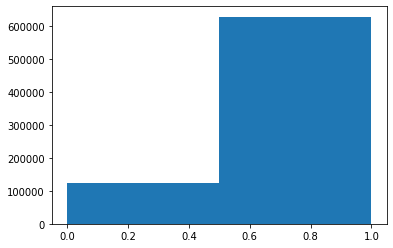

In [ ]:
import matplotlib.pyplot as plt

n = plt.hist(Y, bins=2)
plt.show()

In [ ]:
n

(array([122687., 627469.]),
 array([0. , 0.5, 1. ]),
 <a list of 2 Patch objects>)

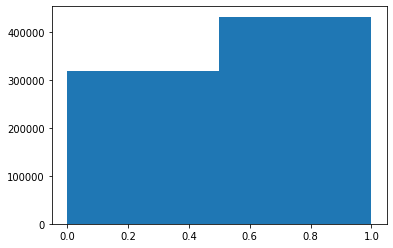

In [ ]:
n_3 = plt.hist(Y_3, bins=2)
plt.show()

In [ ]:
n_3

(array([318547., 431609.]),
 array([0. , 0.5, 1. ]),
 <a list of 2 Patch objects>)

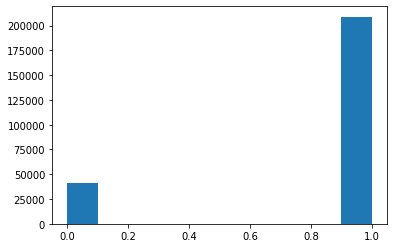

In [ ]:
n_test = plt.hist(Y_test)
plt.show()

In [ ]:
n_test

(array([ 41044.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 209009.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

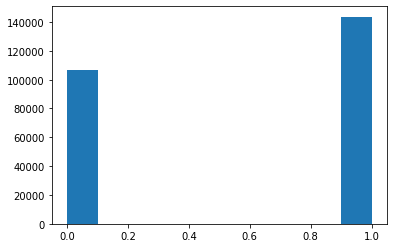

In [ ]:
n_test_3 = plt.hist(Y_test_3)
plt.show()

In [ ]:
n_test_3

(array([106381.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 143672.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)